Types of clustering algorithms available in Sci-Kit Learn

| Method name                  | Parameters                                                       | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                               | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                                       | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                                        | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                               | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters or distance threshold                         | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters or distance threshold, linkage type, distance | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                                | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| OPTICS                       | minimum cluster membership                                       | Very large n_samples, large n_clusters                      | Non-flat geometry, uneven cluster sizes, variable cluster density         | Distances between points                     |
| Gaussian mixtures            | many                                                             | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer.          | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |



In [38]:
import pandas as pd

iris = pd.read_csv("../../Datasets/Iris.csv")

#I'm loading the data and the target, but often in clustering examples we won't have a target.
X = iris[["sepal_length", "petal_length", "petal_width"]].to_numpy()
y = iris["species"]
print(X)
print(y)



[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.1]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.5 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1 4.7 1.4]
 [5.6 3.6 1.3]
 [6.7 4.4 1.4]
 [5.6 4.5 

The most common clustering algorithm is K-Means clustering. 

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.


In [39]:

from sklearn.cluster import KMeans


k_means = KMeans(3)
k_means.fit(X)

labels = k_means.predict(X)
print(labels)




[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Viewing the K-Means Clusters

Here we create a 3D scatter plot. Where each axis will correspond to a column of our original iris dataset.

We can plot each point of cluster as color them deterined by the cluster membership.
We can then plot the cluster centres which are the average values of all the members of that cluster.

Finally we can plot the original dataset, using the labels as colors to inpsect the truth.


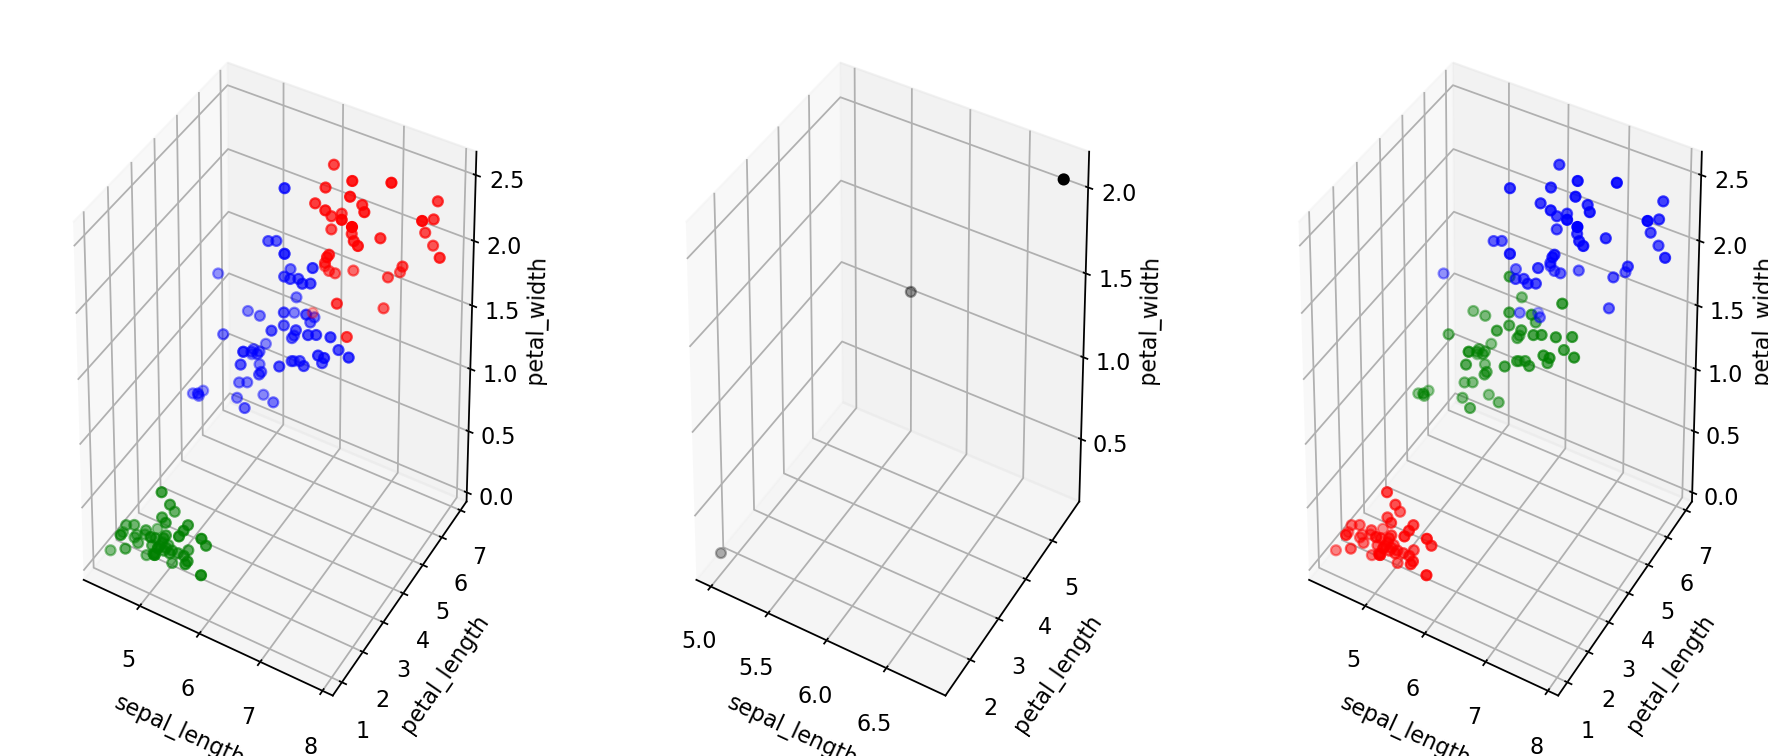

In [50]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
colors = ["red", "green", "blue"]


fig = plt.figure(figsize=(14, 6), dpi=160)
ax = fig.add_subplot(1,3,1, projection='3d')
ax1 = fig.add_subplot(1,3,2, projection='3d')
ax2 = fig.add_subplot(1,3,3, projection='3d')

#map the colors to the labels
colors_map = list(map(lambda l: colors[l], labels))

ax.scatter(X[:,0], X[:,1], X[:,2], c=colors_map)
ax.set_xlabel("sepal_length")
ax.set_ylabel("petal_length")
ax.set_zlabel("petal_width")

#plot the 3 cluster centres
flat_c= ["black","black","black"]
C = k_means.cluster_centers_

ax1.scatter(C[:,0], C[:,1], C[:,2], c=flat_c)
ax1.set_xlabel("sepal_length")
ax1.set_ylabel("petal_length")
ax1.set_zlabel("petal_width")

#transform the original data to a label encoding of 0,1,2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding = le.fit_transform(y)

#map the encoding to the colors
colors_orig_map = list(map(lambda l: colors[l], encoding))

ax2.scatter(X[:,0], X[:,1], X[:,2], c=colors_orig_map)
ax2.set_xlabel("sepal_length")
ax2.set_ylabel("petal_length")
ax2.set_zlabel("petal_width")


plt.show()